In [998]:
# from google.colab import drive
# drive.mount('/content/drive')
import pandas as pd

In [999]:
# !pwd

In [1000]:
# !pip install transformers

In [1001]:
# ROOT = '/home/ubuntu/siheon/patentMatch1028.csv'
ROOT2 = '/home/ubuntu/siheon/alldata.csv'
ROOT = '/home/ubuntu/siheon/dataset/a_df.csv'
ROOT_2 = '/home/ubuntu/siheon/dataset/b_df.csv'
sample_train = pd.read_csv(f'{ROOT}')
sample2_train = pd.read_csv(f'{ROOT_2}')
uspto_1 = pd.read_csv(f'{ROOT2}')


In [1002]:
uspto_1.head()

,A_Patent,B_patent,A_abstract,B_abstarct,A_code,B_code,similarity,A_semi_code,B_semi_code,A_bert_sentence_embedding,B_bert_sentence_embedding
0,4500885,4500884,A data link for an automatic aircraft carrier ...,A data link for an automatic aircraft carrier ...,G01S1108,G01S1108,0.9142,G,G,[ 0.5431107 -0.13675559 -0.10359283 ... 0.21...,[ 0.5431107 -0.13675559 -0.10359283 ... 0.21...
1,3900872,3898656,A storage type phase coherent pulse doppler ra...,A storage type phase coherent pulse doppler ra...,G01S1350,G11C27024,0.7179,G,G,[ 0.6121705 -0.2982698 -0.01273062 ... 0.03...,[ 0.4294736 -0.50694084 0.00611519 ... -0.05...
2,4241212,4241211,New chemical compounds bis quaternary carbama...,New chemical compounds bis quaternary carbama...,C06D700,C07D21365,0.6176,C,C,[ 0.13732934 0.09446751 -0.14751866 ... -1.04...,[ 0.02939841 0.21113142 0.00251852 ... -0.67...
3,4183302,4178854,A system which disperses a payload sequentiall...,A system which disperses a payload in a sequen...,F42B1258,F42B1270,0.6382,F,F,[ 0.2571813 -0.18118271 0.21904124 ... -0.20...,[ 0.2124389 -0.3055582 0.21864206 ... -0.08...
4,3667460,3667459,An improved ventilation system for a space sui...,An improved ventilation system for a space sui...,A62B1804,A62B1804,0.8750,A,A,[ 0.16284604 0.12701163 0.0834481 ... -0.22...,[ 0.12426025 0.05895356 0.1648785 ... -0.23...


In [1003]:
len(uspto_1)

1276

In [1004]:
uspto_1['A_semi_code'].value_counts()

C    437
B    236
G    158
F    129
A    117
H    115
E     53
D     31
Name: A_semi_code, dtype: int64

In [1005]:
uspto_1['B_semi_code'].value_counts()

C    449
B    251
G    155
F    117
H    117
A    109
E     41
D     37
Name: B_semi_code, dtype: int64

In [1006]:
print(len(sample_train))
print(len(sample2_train))

1500
1500


In [1007]:
sample_train.head()
sample_train = pd.concat([sample_train,sample2_train],ignore_index = True, axis=1)

In [1008]:
sample_train.head()

,0,1,2,3,4,5
0,5188273,"An expander roller for running webs of paper, ...",B65H23/0256,5046953,Method and apparatus for creating an electrica...,H01R13/2414
1,4668718,The invention relates to epoxy resin moulding ...,H01B3/40,5106300,A dental implant attachment structure comprise...,A61C8/0048
2,5139819,A thermally curable polymer thick film composi...,H05K1/095,5114370,A bodyboard is provided which incorporates sel...,B63B32/50
3,5057239,Spiranic lactone of formula <IMAGE> (I) posses...,C11B9/0088,5148875,The present invention comprises a method and a...,E21B7/208
4,4776651,Socket contact (10) has cantilever arms (16) w...,H01R12/585,4681036,A delay starter device includes an elongated c...,F42B3/16


In [1009]:
sample_train.columns = ['A_Patent','A_abstract','A_code','B_patent','B_abstarct','B_code']

In [1010]:
sample_train.head()

,A_Patent,A_abstract,A_code,B_patent,B_abstarct,B_code
0,5188273,"An expander roller for running webs of paper, ...",B65H23/0256,5046953,Method and apparatus for creating an electrica...,H01R13/2414
1,4668718,The invention relates to epoxy resin moulding ...,H01B3/40,5106300,A dental implant attachment structure comprise...,A61C8/0048
2,5139819,A thermally curable polymer thick film composi...,H05K1/095,5114370,A bodyboard is provided which incorporates sel...,B63B32/50
3,5057239,Spiranic lactone of formula <IMAGE> (I) posses...,C11B9/0088,5148875,The present invention comprises a method and a...,E21B7/208
4,4776651,Socket contact (10) has cantilever arms (16) w...,H01R12/585,4681036,A delay starter device includes an elongated c...,F42B3/16


In [1011]:
sample_train = sample_train[['A_Patent','B_patent','A_abstract','B_abstarct','A_code','B_code']]

In [1012]:
sample_train.head()

,A_Patent,B_patent,A_abstract,B_abstarct,A_code,B_code
0,5188273,5046953,"An expander roller for running webs of paper, ...",Method and apparatus for creating an electrica...,B65H23/0256,H01R13/2414
1,4668718,5106300,The invention relates to epoxy resin moulding ...,A dental implant attachment structure comprise...,H01B3/40,A61C8/0048
2,5139819,5114370,A thermally curable polymer thick film composi...,A bodyboard is provided which incorporates sel...,H05K1/095,B63B32/50
3,5057239,5148875,Spiranic lactone of formula <IMAGE> (I) posses...,The present invention comprises a method and a...,C11B9/0088,E21B7/208
4,4776651,4681036,Socket contact (10) has cantilever arms (16) w...,A delay starter device includes an elongated c...,H01R12/585,F42B3/16


In [1013]:
# PatentMatch

# sample_train['A_semi_code'] = sample_train['patent_a_code'].str.get(i=0)
# sample_train['B_semi_code'] = sample_train['patent_b_code'].str.get(i=0)
# sample_train.dropna(inplace = True)
# print(len(sample_train))
# sample_train= sample_train[['patent_A_name','patent_B_name','patent_A_abstract','patent_B_abstract','patent_a_code','patent_b_code','A_semi_code','B_semi_code']]
# sample_train.head()

sample_train['A_semi_code'] = sample_train['A_code'].str.get(i=0)
sample_train['B_semi_code'] = sample_train['B_code'].str.get(i=0)
sample_train.dropna(inplace = True)
print(len(sample_train))
sample_train= sample_train[['A_Patent','B_patent','A_abstract','B_abstarct','A_code','B_code','A_semi_code','B_semi_code']]
sample_train.head()



1500


,A_Patent,B_patent,A_abstract,B_abstarct,A_code,B_code,A_semi_code,B_semi_code
0,5188273,5046953,"An expander roller for running webs of paper, ...",Method and apparatus for creating an electrica...,B65H23/0256,H01R13/2414,B,H
1,4668718,5106300,The invention relates to epoxy resin moulding ...,A dental implant attachment structure comprise...,H01B3/40,A61C8/0048,H,A
2,5139819,5114370,A thermally curable polymer thick film composi...,A bodyboard is provided which incorporates sel...,H05K1/095,B63B32/50,H,B
3,5057239,5148875,Spiranic lactone of formula <IMAGE> (I) posses...,The present invention comprises a method and a...,C11B9/0088,E21B7/208,C,E
4,4776651,4681036,Socket contact (10) has cantilever arms (16) w...,A delay starter device includes an elongated c...,H01R12/585,F42B3/16,H,F


In [1014]:
#patentmatch
# sample_train = sample_train[(sample_train['patent_A_abstract'].str.count(" ")+1 < 510) & (sample_train['patent_B_abstract'].str.count(" ")+1 < 510)]
#uspto
sample_train = sample_train[(sample_train['A_abstract'].str.count(" ")+1 < 510) & (sample_train['B_abstarct'].str.count(" ")+1 < 510)]

In [1015]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Quadro RTX 6000


In [1016]:
import numpy as np


In [1018]:
from transformers import BertTokenizer, BertModel
import logging
import matplotlib.pyplot as plt
%matplotlib inline

# tokenizer = BertTokenizer.from_pretrained('anferico/bert-for-patents')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')


In [1019]:
# !pwd

In [1020]:
df = sample_train
# df = pd.read_csv('/content/drive/MyDrive/2022/Patent_DataSet/USPTO/patent_claims_fulltext.csv',usecols=[])

In [1021]:
df.head()

,A_Patent,B_patent,A_abstract,B_abstarct,A_code,B_code,A_semi_code,B_semi_code
0,5188273,5046953,"An expander roller for running webs of paper, ...",Method and apparatus for creating an electrica...,B65H23/0256,H01R13/2414,B,H
1,4668718,5106300,The invention relates to epoxy resin moulding ...,A dental implant attachment structure comprise...,H01B3/40,A61C8/0048,H,A
2,5139819,5114370,A thermally curable polymer thick film composi...,A bodyboard is provided which incorporates sel...,H05K1/095,B63B32/50,H,B
3,5057239,5148875,Spiranic lactone of formula <IMAGE> (I) posses...,The present invention comprises a method and a...,C11B9/0088,E21B7/208,C,E
4,4776651,4681036,Socket contact (10) has cantilever arms (16) w...,A delay starter device includes an elongated c...,H01R12/585,F42B3/16,H,F


In [1022]:
df['A_semi_code'].value_counts()

C    571
G    235
B    224
H    170
A    147
F    110
E     22
D     21
Name: A_semi_code, dtype: int64

In [1023]:
df['B_semi_code'].value_counts()

C    612
G    231
B    207
H    173
A    137
F     98
E     24
D     18
Name: B_semi_code, dtype: int64

In [1024]:
#patentmatch
# df_sample1 = df[['patent_A_name','patent_A_abstract','A_semi_code']]
# df_sample1.columns = ['Patent','text','label']
# df_sample2 = df[['patent_B_name','patent_B_abstract','B_semi_code']]
# df_sample2.columns = ['Patent','text','label']

# df_sample = pd.concat([df_sample1,df_sample2],axis = 0,ignore_index=True)
# df_test = df_sample[['text','label']]
# df_test.head()

# uspto
df_sample1 = df[['A_Patent','A_abstract','A_semi_code']]
df_sample1.columns = ['Patent','text','label']
df_sample2 = df[['B_patent','B_abstarct','B_semi_code']]
df_sample2.columns = ['Patent','text','label']

df_sample = pd.concat([df_sample1,df_sample2],axis = 0,ignore_index=True)
df_test = df_sample[['text','label']]
# append_method = {'text':['in this study, in order to create a model that reduces the search scope by grasping the context characteristics of each patent, it is proposed to vectorize it with the natural language processing model BERT and recommend a patent using the Contrast Loss function. We learn the model using USPTO data provided by Harvard Database to see if the correlation between Jacquard similarity and Euclidean distance changes depending on whether or not Contrastive Loss is used.','An easy opening container in which the end closure is formed with annular fold bands. A weakening line to define a removable panel portion is formed in the central panel slightly outboard of the folded smooth edge of the annular fold bands so that the folded edge protects the user from the sharp edges after removal of the removable panel portion. This disclosure also relates to a method for forming the above described easy opening end closure wherein the weakening line is formed in the end panel prior to complete formation of the fold band.','This application discloses a metallic convenience closure of the full panel tear out type for a container body, in which the closure upstanding side wall which perimetrically surrounds the central closure panel is provided with an inwardly extending protective bead. This bead is spaced above and extends generally parallel to the closure central panel. The score line which circumscribes the removable portion of the closure panel is located entirely radially outwardly of the bead, and therefore the sharp edge which is formed along such score line when the removable portion is removed is in non-cutting relationship with the hand of a person manually emptying the contents of the associated container. The closure is provided with a removal tab, the nose of which is located in the space between the closure panel and the protective bead. The protective bead also serves to radially stiffen the associated container, and a closure with such bead may be used to particular advantage with a semi-rigid container body, e.g., a composite, laminated container body deriving its strength principally from one or more cylindrically wound fiberboard plys or laminations.'],'label':['G','B','B']}
# df_test.append({'text':'With the recent development of artificial intelligence technology, research has been conducted to automate prior investigation of patent technology using a deep learning model. During the prior investigation of patent technology, patent attorneys directly investigate prior patents to identify similar patents and technology trends. However, since the time consumption is very high in the process, it is urgent to distribute the automation system. Previous studies have established a similar patent search system by analyzing the similarity of jacquard, which calculates the frequency of using the same word. Alternatively, words are vectorized in latent space into previous natural language processing models that do not think of contextual features and are made to recommend similar patents. Therefore, in this study, in order to create a model that reduces the search scope by grasping the context characteristics of each patent, it is proposed to vectorize it with the natural language processing model BERT and recommend a patent using the Contrast Loss function. We learn the model using USPTO data provided by Harvard Database to see if the correlation between Jacquard similarity and Euclidean distance changes depending on whether or not Contrastive Loss is used. In addition, to see if the patent search system can help reduce the scope of patent search, it was predicted using PatentMatch data, which is data indicating whether patents violate novelty. Contrastive Loss improves the accuracy of recommended patents by increasing the probability of similar patents gathering by clustering them. In addition, the context can be identified and used in various areas such as selecting papers with similar contents or plagiarism tests.','label':'G'},ignore_index=True)
# df_test.append({'text':'An easy opening container in which the end closure is formed with annular fold bands. A weakening line to define a removable panel portion is formed in the central panel slightly outboard of the folded smooth edge of the annular fold bands so that the folded edge protects the user from the sharp edges after removal of the removable panel portion. This disclosure also relates to a method for forming the above described easy opening end closure wherein the weakening line is formed in the end panel prior to complete formation of the fold band.','label':'B'},ignore_index=True)
# df_test.append({'text':'This application discloses a metallic convenience closure of the full panel tear out type for a container body, in which the closure upstanding side wall which perimetrically surrounds the central closure panel is provided with an inwardly extending protective bead. This bead is spaced above and extends generally parallel to the closure central panel. The score line which circumscribes the removable portion of the closure panel is located entirely radially outwardly of the bead, and therefore the sharp edge which is formed along such score line when the removable portion is removed is in non-cutting relationship with the hand of a person manually emptying the contents of the associated container. The closure is provided with a removal tab, the nose of which is located in the space between the closure panel and the protective bead. The protective bead also serves to radially stiffen the associated container, and a closure with such bead may be used to particular advantage with a semi-rigid container body, e.g., a composite, laminated container body deriving its strength principally from one or more cylindrically wound fiberboard plys or laminations.','label':'B'},ignore_index=True)
# sample = pd.DataFrame(append_method)
# df_test = pd.concat([df_test,sample],ignore_index=True)
# df_test.tail()

In [1025]:
df_test['label'].value_counts()

C    1183
G     466
B     431
H     343
A     284
F     208
E      46
D      39
Name: label, dtype: int64

In [1026]:
df_sample.head()

,Patent,text,label
0,5188273,"An expander roller for running webs of paper, ...",B
1,4668718,The invention relates to epoxy resin moulding ...,H
2,5139819,A thermally curable polymer thick film composi...,H
3,5057239,Spiranic lactone of formula <IMAGE> (I) posses...,C
4,4776651,Socket contact (10) has cantilever arms (16) w...,H


In [1027]:
print(len(df_test))


3000


In [1028]:
from collections import Counter
Counter(df_test["label"])

Counter({'B': 431,
         'H': 343,
         'C': 1183,
         'A': 284,
         'G': 466,
         'F': 208,
         'D': 39,
         'E': 46})

In [1029]:
print(len(df_test))

3000


In [1030]:
from matplotlib import pyplot as plt
import seaborn as sns

In [1031]:
df_test

,text,label
0,"An expander roller for running webs of paper, ...",B
1,The invention relates to epoxy resin moulding ...,H
2,A thermally curable polymer thick film composi...,H
3,Spiranic lactone of formula <IMAGE> (I) posses...,C
4,Socket contact (10) has cantilever arms (16) w...,H
...,...,...
2995,Compounds of the formula ##STR1## wherein R1 a...,C
2996,A silver halide photographic light-sensitive m...,C
2997,A process is disclosed for recovering tungsten...,C
2998,First to third N+ -type impurity regions are f...,H


In [1032]:
df_test["text"] = df_test["text"].apply(str)

/home/ubuntu/anaconda3/envs/pytorch1.7.1_p37/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [1033]:
print(df_test['text'][2])

A thermally curable polymer thick film compositions comprising, by weight:


In [1034]:
print(df_test['text'][0].split())

['An', 'expander', 'roller', 'for', 'running', 'webs', 'of', 'paper,', 'textile', 'material', 'or', 'the', 'like', 'has', 'a', 'straight', 'metallic', 'or', 'plastic', 'core', 'and', 'an', 'outer', 'layer', 'consisting', 'of', 'two', 'helically', 'convoluted', 'strips', 'of', 'rubber', 'or', 'other', 'elastomeric', 'material.', 'The', 'two', 'convoluted', 'webs', 'are', 'mirror', 'images', 'of', 'each', 'other', 'with', 'reference', 'to', 'a', 'plane', 'which', 'extends', 'between', 'them', 'and', 'is', 'normal', 'to', 'the', 'axis', 'of', 'the', 'core.', 'The', 'external', 'surface', 'of', 'the', 'outer', 'layer', 'is', 'profiled', 'in', 'that', 'it', 'is', 'provided', 'with', 'grooves', 'cut', 'into', 'or', 'otherwise', 'formed', 'in', 'the', 'strips', 'and', 'forming', 'helices', 'as', 'a', 'result', 'of', 'convolution', 'of', 'the', 'respective', 'strips', 'onto', 'the', 'core.', 'Each', 'helical', 'groove', 'is', 'adjacent', 'a', 'deformable', 'lip', 'which', 'defines', 'a', 'port

In [1035]:
print(len(df_test['text'][0].split()))

148


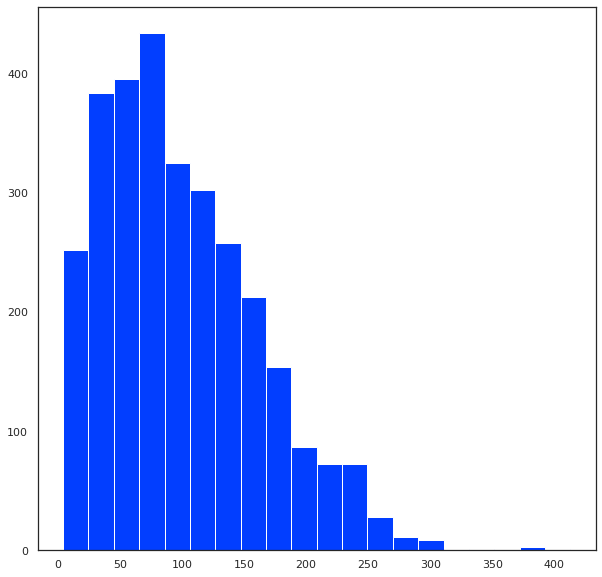

In [1036]:
sentence_num = []

for i,v in enumerate(df_test['text']):
    sentence_num.append(len(df_test['text'][i].split()))
    # print(i)
plt.figure(figsize = (10,10))
plt.hist(sentence_num, bins = 20)
plt.show()

In [1037]:
# Print the sentence split into tokens.
print('Tokenized: ', tokenizer.tokenize(df_test['text'][0]))

# Print the sentence mapped to token ids.
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(df_test['text'][0])))

print(type(tokenizer.tokenize(df_test['text'][1215])))
print(type(tokenizer.convert_tokens_to_ids(tokenizer.tokenize(df_test['text'][1215]))))

# print(type(1))

Tokenized:  ['an', 'expand', '##er', 'roller', 'for', 'running', 'web', '##s', 'of', 'paper', ',', 'textile', 'material', 'or', 'the', 'like', 'has', 'a', 'straight', 'metallic', 'or', 'plastic', 'core', 'and', 'an', 'outer', 'layer', 'consisting', 'of', 'two', 'he', '##lica', '##lly', 'con', '##vo', '##lu', '##ted', 'strips', 'of', 'rubber', 'or', 'other', 'el', '##ast', '##ome', '##ric', 'material', '.', 'the', 'two', 'con', '##vo', '##lu', '##ted', 'web', '##s', 'are', 'mirror', 'images', 'of', 'each', 'other', 'with', 'reference', 'to', 'a', 'plane', 'which', 'extends', 'between', 'them', 'and', 'is', 'normal', 'to', 'the', 'axis', 'of', 'the', 'core', '.', 'the', 'external', 'surface', 'of', 'the', 'outer', 'layer', 'is', 'profile', '##d', 'in', 'that', 'it', 'is', 'provided', 'with', 'grooves', 'cut', 'into', 'or', 'otherwise', 'formed', 'in', 'the', 'strips', 'and', 'forming', 'he', '##lices', 'as', 'a', 'result', 'of', 'con', '##vo', '##lu', '##tion', 'of', 'the', 'respective',

In [1038]:
print(f'max_sentence : {max(sentence_num)}')
print(f'min_sentence : {min(sentence_num)}')
print(f'mean_sentence : {np.mean(sentence_num)}')

sentence_over_512_num = 0
for i in sentence_num:
    if i >512:
        sentence_over_512_num += 1
print(f'sentence_512_over : {sentence_over_512_num}')

max_sentence : 413
min_sentence : 4
mean_sentence : 99.53633333333333
sentence_512_over : 0


In [1039]:
marked_text = {}
# marked_text_df_vali = []

tokenized_text = {}
# tokenized_text_df_vali = []

indexed_tokens = {}
# indexed_tokens_df_vali = []

segments_ids = {}
# segments_ids_df_vali = []

In [1040]:
# 2 3
# 2 5 
# 3 6

# for i in p:
#     i[:,0] -> 0번째꺼 출력
#     i[:0] -> 안나옴

In [1041]:
for i,v in enumerate(df_test['text']):
    marked_text[v] = "[CLS] " + v + " [SEP]"
    # Split the sentence into tokens
    tokenized_text[v] = tokenizer.tokenize(marked_text[v])
    if len(tokenized_text[v]) > 511 or len(tokenized_text[v]) < 10:
        tokenized_text[v] = tokenized_text[v][:511]
        tokenized_text[v].append("[SEP]")
    # Map the token strings to their vocabulary indeces
    indexed_tokens[v] = tokenizer.convert_tokens_to_ids(tokenized_text[v])
    # Mark each of the 22 tokens as belinging to sentence : 1".
    segments_ids[v] = [1] * len(tokenized_text[v])
    

# for i in range(len(df_vali)):
#     if len(df_vali['text'][i].split()) < 510:
#         marked_text_df_vali.append("[CLS] " + df_vali['text'][i] + " [SEP]")
#     else:
#         marked_text_df_vali.append("[CLS] " + df_vali['text'][i][:510] + " [SEP]")
#     # Split the sentence into tokens
#     tokenized_text.append(tokenizer.tokenize(marked_text[i]))
#     # Map the token strings to their vocabulary indeces
#     indexed_tokens.append(tokenizer.convert_tokens_to_ids(tokenized_text[i]))
#     # Mark each of the 22 tokens as belinging to sentence : 1".
#     segments_ids.append([1] * len(tokenized_text[i]))

In [905]:
print(tokenizer.tokenize('kdjoisjdifh'))
print(tokenizer.convert_tokens_to_ids(tokenizer.tokenize('kdjoisjdifh')))

['k', '##d', '##jo', '##is', '##j', '##di', '##f', '##h']
[1047, 2094, 5558, 2483, 3501, 4305, 2546, 2232]


In [906]:
# i = 0
# print(df_test['text'][i])
# print(len(df_test['text'][i]))

# print(marked_text[i])
# print(len(marked_text[i]))

# print(tokenized_text[i])
# print(len(tokenized_text[i]))

In [907]:
# print(df_test['text'][0].split())

In [908]:
list(tokenizer.vocab.keys())[5000:5020]

['knight',
 'lap',
 'survey',
 'ma',
 '##ow',
 'noise',
 'billy',
 '##ium',
 'shooting',
 'guide',
 'bedroom',
 'priest',
 'resistance',
 'motor',
 'homes',
 'sounded',
 'giant',
 '##mer',
 '150',
 'scenes']

In [909]:
# for tup,index in zip(tokenized_text[0],indexed_tokens[0]):
#     print(f"{tup} : {index}")

In [910]:
# print(segments_ids[3])

In [911]:
# Convert inputs to PyTorch tensors df_vali
tokens_tensor = {}
segments_tensors = {}

# tokens_tensor_df_vali = []
# segments_tensors_df_vali = []

for i,v in enumerate(df_test['text']):
    tokens_tensor[v] = torch.tensor([indexed_tokens[v]])
    segments_tensors[v] = torch.tensor([segments_ids[v]])
    
# for i in range(len(df_vali)):
#     tokens_tensor_df_vali.append(torch.tensor([indexed_tokens[i]]))
#     segments_tensors_df_vali.append(torch.tensor([segments_ids[i]]))

In [912]:
print(len(tokens_tensor))
print(len(segments_tensors))


2719
2719


In [1042]:
# Load pre-trained model (weights)
# model = BertModel.from_pretrained('anferico/bert-for-patents',
#                                   output_hidden_states = True, # Whether the model returns all hidden--states
#                                   )
# model.eval()
model = BertModel.from_pretrained('bert-base-uncased',
                                  output_hidden_states = True, # Whether the model returns all hidden--states
                                  )
model.eval()


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0): BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
          

In [914]:
print(len(tokens_tensor))
print(len(segments_tensors))

2719
2719


In [915]:
print(tokens_tensor[df_test['text'][0]])

tensor([[  101,  2019,  7818,  2121, 11220,  2005,  2770,  4773,  2015,  1997,
          3259,  1010, 12437,  3430,  2030,  1996,  2066,  2038,  1037,  3442,
         12392,  2030,  6081,  4563,  1998,  2019,  6058,  6741,  5398,  1997,
          2048,  2002, 19341,  9215,  9530,  6767,  7630,  3064, 12970,  1997,
          8903,  2030,  2060,  3449, 14083,  8462,  7277,  3430,  1012,  1996,
          2048,  9530,  6767,  7630,  3064,  4773,  2015,  2024,  5259,  4871,
          1997,  2169,  2060,  2007,  4431,  2000,  1037,  4946,  2029,  8908,
          2090,  2068,  1998,  2003,  3671,  2000,  1996,  8123,  1997,  1996,
          4563,  1012,  1996,  6327,  3302,  1997,  1996,  6058,  6741,  2003,
          6337,  2094,  1999,  2008,  2009,  2003,  3024,  2007, 25880,  3013,
          2046,  2030,  4728,  2719,  1999,  1996, 12970,  1998,  5716,  2002,
         29146,  2004,  1037,  2765,  1997,  9530,  6767,  7630,  3508,  1997,
          1996,  7972, 12970,  3031,  1996,  4563,  

In [916]:
print(segments_tensors[df_test['text'][0]])

tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])


In [917]:
# df_vali
outputs = {}
hidden_states = {}

# outputs_df_vali = []
# hidden_states_df_vali = []

for i,v in enumerate(df_test['text']):
    with torch.no_grad():
        outputs[v] = model(tokens_tensor[v], segments_tensors[v])
        hidden_states[v] = outputs[v][2]

# for i in range(len(df_vali)):
#     with torch.no_grad():
#         outputs_df_vali.append(model(tokens_tensor[i], segments_tensors[i]))
#         hidden_states_df_vali.append(outputs[i][2])

In [918]:
len(hidden_states)

2719

In [919]:
# print ("Number of layers:", len(hidden_states[0]), "  (initial embeddings + 12 BERT layers)")
# layer_i = 0

# print ("Number of batches:", len(hidden_states[0][layer_i]))
# batch_i = 0

# print ("Number of tokens:", len(hidden_states[0][layer_i][batch_i]))
# token_i = 0

# print ("Number of hidden units:", len(hidden_states[0][layer_i][batch_i][token_i]))

In [920]:
# # For the 5th token in our sentence, select its feature values from layer 5

# token_i = 5
# layer_i = 5
# vec = hidden_states[0][layer_i][batch_i][token_i]

# # #plot the values as a histogram to show their distribution
# plt.figure(figsize=(10,10))
# plt.hist(vec, bins = 200)
# plt.show()

In [921]:
# Current diemnsions [tokens, batchs, layers, features]
# desired dimensions [tokens, layers, features]

In [922]:
# hidden_states is a python list
# print("Type of hidden_states : " , type(hidden_states[0]))

# # Each layer in the list is a torch tensor
# print("Tensor shape for each layer : ", hidden_states[0][0].size())

In [923]:
# hidden_states[0][0]

In [924]:
token_embeddings={}
# token_embeddings_df_vali=[]
# print(hidden_states[df_test['text'][0]])
for i,v in enumerate(df_test['text']):
    token_embeddings[v] = torch.stack(hidden_states[v], dim = 0)
# !!
# token_embeddings[0].size()

# for i in range(len(hidden_states_df_vali)):
#     token_embeddings_df_vali.append(torch.stack(hidden_states_df_vali[i], dim = 0))
# # token_embeddings_df_vali[0].size()

In [925]:
print(token_embeddings[df_test['text'][0]])

tensor([[[[ 0.1686, -0.2858, -0.3261,  ..., -0.0276,  0.0383,  0.1640],
          [-0.1262,  0.3816, -0.3932,  ..., -0.0759,  0.0695,  0.0656],
          [ 0.0233,  0.2247, -0.8937,  ...,  0.2087,  1.1840, -0.5379],
          ...,
          [ 0.9631,  0.2200, -0.7636,  ..., -1.5814,  0.3510, -1.9825],
          [-0.2123,  0.4258,  0.3183,  ...,  0.3571,  0.5998,  0.3512],
          [-0.4196, -0.0327,  0.2675,  ..., -1.0289,  0.3465, -0.6613]]],


        [[[ 0.0058,  0.0426, -0.2727,  ...,  0.1930, -0.0154,  0.0454],
          [-0.2068,  0.5412, -0.3272,  ...,  0.1700,  0.3489,  0.5144],
          [ 1.1167, -0.2560, -1.3851,  ...,  0.2451,  0.6359, -0.2331],
          ...,
          [ 1.5856,  0.0356, -1.4272,  ..., -1.4898,  0.1853, -1.9114],
          [-0.4323, -0.0031,  0.0245,  ...,  0.0976,  0.2126, -0.0641],
          [-0.4105, -0.2227,  0.1803,  ..., -0.6738,  0.5128, -0.7514]]],


        [[[-0.1315, -0.2507, -0.4559,  ...,  0.1715,  0.1639,  0.0373],
          [-0.1578,  0.443

In [926]:
# token_embeddings_example = torch.squeeze(token_embeddings[0],dim=1)
# print(token_embeddings_example.size())

# token_embeddings_example_df_vali = torch.squeeze(token_embeddings_df_vali[0],dim=1)
# print(token_embeddings_example.size())

In [927]:
# remove dimension 1 , the batches

for i,v in enumerate(df_test['text']):
    token_embeddings[v] = torch.squeeze(token_embeddings[v], dim = 1)
    
# for i in range(len(token_embeddings_df_vali)):
#     token_embeddings_df_vali[i] = torch.squeeze(token_embeddings_df_vali[i], dim = 1)

In [928]:
# Swap dimensions 0 and 1
for i,v in enumerate(df_test['text']):
    token_embeddings[v] = token_embeddings[v].permute(1,0,2)
token_embeddings[df_test['text'][1215]].size()
token_embeddings[df_test['text'][1215]][-4]
# for i in range(len(token_embeddings)):
#     token_embeddings[i] = token_embeddings[i].permute(1,0,2)
# token_embeddings[0].size()

# for i in range(len(token_embeddings_df_vali)):
#     token_embeddings_df_vali[i] = token_embeddings_df_vali[i].permute(1,0,2)
# # token_embeddings[0].size()

tensor([[ 1.1353,  0.7797,  0.8550,  ..., -0.8850, -1.0220, -0.5566],
        [ 1.6501,  0.6955,  1.1366,  ..., -1.2550, -1.5326, -0.4295],
        [ 1.9041,  1.0782,  1.1516,  ..., -1.5538, -1.6461, -0.2101],
        ...,
        [ 0.7079,  1.0604,  0.9770,  ..., -0.6532, -0.2741, -0.4178],
        [ 1.0231,  1.2310,  0.9776,  ..., -0.4297, -0.3105, -0.3717],
        [ 0.8276,  1.1463,  0.5422,  ...,  0.0415, -0.0604, -0.2655]])

## Token_vectors

In [929]:
token_embeddings[df_test['text'][0]][-4]

tensor([[-1.0324,  0.6199,  0.4087,  ..., -0.4882,  0.2788, -1.0689],
        [-1.0724,  0.1457,  0.0715,  ..., -0.0956,  0.1724, -1.2838],
        [-0.8172,  0.1746, -0.0592,  ...,  0.1569, -0.2075, -1.6279],
        ...,
        [-1.1350, -0.6066, -0.2541,  ...,  0.6618, -0.1145, -0.1397],
        [-1.1010, -0.3699, -0.4077,  ...,  0.7619, -0.1810,  0.4074],
        [-0.9761, -0.3119, -0.2074,  ...,  0.6896, -0.1545,  0.3372]])

In [930]:
sample = torch.cat((token_embeddings[df_test['text'][0]][-1],token_embeddings[df_test['text'][0]][-2],token_embeddings[df_test['text'][0]][-3],token_embeddings[df_test['text'][0]][-4]),dim = 0)
sample.size()

torch.Size([52, 768])

In [931]:
df_test['text'][1200]

'Crystalline molecular sieves having three-dimensional microporous framework structures of MnO2, AlO2, SiO2 and PO2 tetrahedral oxide units are disclosed. These molecular sieves have an empirical chemical composition on an anhydrous basis expressed by the formula:'

In [932]:
token_embeddings[df_test['text'][1215]][-4]# 1215 = [3,25,1024]

tensor([[ 1.1353,  0.7797,  0.8550,  ..., -0.8850, -1.0220, -0.5566],
        [ 1.6501,  0.6955,  1.1366,  ..., -1.2550, -1.5326, -0.4295],
        [ 1.9041,  1.0782,  1.1516,  ..., -1.5538, -1.6461, -0.2101],
        ...,
        [ 0.7079,  1.0604,  0.9770,  ..., -0.6532, -0.2741, -0.4178],
        [ 1.0231,  1.2310,  0.9776,  ..., -0.4297, -0.3105, -0.3717],
        [ 0.8276,  1.1463,  0.5422,  ...,  0.0415, -0.0604, -0.2655]])

In [933]:
# Stores the token vectors, with shape [22 x 3,072]
token_vecs_cat = {}
cat_vec = {}

# token_vecs_cat_df_vali = []
# cat_vec_df_vali = []
# `token_embeddings` is a [22 x 12 x 768] tensor.

# For each token in the sentence...
for i,v in enumerate(df_test['text']):
    
    # `token` is a [12 x 768] tensor

    # Concatenate the vectors (that is, append them together) from the last 
    # four layers.
    # Each layer vector is 768 values, so `cat_vec` is length 3,072.
    cat_vec[v] = torch.cat((token_embeddings[v][-1], token_embeddings[v][-2], token_embeddings[v][-3], token_embeddings[v][-4]), dim=0)
    # Use `cat_vec` to represent `token`.
    token_vecs_cat[v] = cat_vec[v]

# print ('Shape is: %d x %d' % (len(token_vecs_cat[0]), len(token_vecs_cat[0][0])))

# for i in range(len(token_embeddings_df_vali)):
    
#     # `token` is a [12 x 768] tensor

#     # Concatenate the vectors (that is, append them together) from the last 
#     # four layers.
#     # Each layer vector is 768 values, so `cat_vec` is length 3,072.
#     cat_vec_df_vali.append(torch.cat((token_embeddings_df_vali[i][-1], token_embeddings_df_vali[i][-2], token_embeddings_df_vali[i][-3], token_embeddings_df_vali[i][-4]), dim=0))
#     # Use `cat_vec` to represent `token`.
#     token_vecs_cat_df_vali.append(cat_vec[i])

In [934]:
# Stores the token vectors, with shape 
# token_vecs_cat = []
# cat_vec = []
token_vecs_sum = {}
sum_vec = {}

# token_vecs_sum_df_vali = []
# sum_vec_df_vali = []

for i,v in enumerate(df_test['text']):
    sum_vec[v] = torch.sum(token_embeddings[v][-4],dim=0)
    token_vecs_sum[v] = sum_vec[v]
    
# for i in range(len(df_vali)):
#     sum_vec_df_vali.append(torch.sum(token_embeddings_df_vali[i][-4],dim=0))
#     token_vecs_sum_df_vali.append(sum_vec_df_vali[i])

In [935]:
# print ('Shape is: %d x %d' % (len(token_vecs_sum), len(token_vecs_sum[0])))

# print(len(token_vecs_cat),len(token_vecs_cat[0])

## Sentence Vectors

각 토큰의 두번째 마지막 숨겨진 레이어를 평균화 하는것

In [936]:
# hidden_states[0][-2][0]

In [937]:
token_vecs = {}
sentence_embedding = {}

# token_vecs_df_vali = []
# sentence_embedding_df_vali = []


for i,v in enumerate(df_test['text']):
    token_vecs[v] = hidden_states[v][-2][0]

    sentence_embedding[v] = torch.mean(token_vecs[v], dim= 0)

# print(f"Our final sentence embedding vector of shape : {sentence_embedding[0].size()}")

# for i in range(len(df_vali)):
#     token_vecs_df_vali.append(hidden_states_df_vali[i][-2][0])

#     sentence_embedding_df_vali.append(torch.mean(token_vecs_df_vali[i], dim= 0))

In [938]:
df_test.head()

,text,label
0,"An expander roller for running webs of paper, ...",B
1,The invention relates to epoxy resin moulding ...,H
2,A thermally curable polymer thick film composi...,H
3,Spiranic lactone of formula <IMAGE> (I) posses...,C
4,Socket contact (10) has cantilever arms (16) w...,H


In [939]:
print(len(df_test))
print(len(token_embeddings))
print(len(sentence_embedding))

3000
2719
2719


In [940]:
sentence_embedding_list = {}
token_embeddings_list = {}

# sentence_embedding_list_df_vali = []
# token_embeddings_list_df_vali = []

for i,v in enumerate(df_test['text']):
    sentence_embedding_list[v] = sentence_embedding[v].numpy()

for i,v in enumerate(df_test['text']):
    token_embeddings_list[v] = token_embeddings[v].numpy()
    
# for i in range(len(sentence_embedding_df_vali)):
#     sentence_embedding_list_df_vali.append(sentence_embedding_df_vali[i].numpy())

# for i in range(len(token_embeddings_df_vali)):
#     token_embeddings_list_df_vali.append(token_embeddings_df_vali[i].numpy())

In [941]:
# print(sentence_embedding_list[:3])

print('---------')
# print(token_embeddings_list[:3])

---------


In [942]:
t_sne_dataframe = pd.DataFrame(columns = ['patentName','text','bert_token_embedding','bert_sentence_embedding','label','tokenized_text'])
for i,v in enumerate(df_test['text']):
    try:
        t_sne_dataframe.loc[i] = [df_sample['Patent'][i],v,hidden_states[v][-2][0],sentence_embedding[v],df_test['label'][i],tokenized_text[v]]
    except:
        continue
    
# t_sne_function = {
#     'text' : df_test['text'],
#     'bert_token_embedding': token_embeddings_list,
#     'bert_sentence_embedding' : sentence_embedding_list,
#     'label' : df_test['label']
# }

# t_sne_function_df_vali = {
#     'text' : df_vali['text'],
#     'bert_token_embedding': token_embeddings_list_df_vali,
#     'bert_sentence_embedding' : sentence_embedding_list_df_vali,
#     'label' : df_vali['label']
# }

In [943]:
print(len(t_sne_dataframe))
# print(t_sne_dataframe[1].size)

3000


In [944]:
# !pwd

In [945]:
# t_sne_dataframe.to_pickle('/home/ubuntu/siheon/1031dataframe.pickle')

In [946]:
len(t_sne_dataframe)

3000

In [947]:
# print(len(df_test['text']))
# print(len(token_embeddings_list))
# print(len(sentence_embedding_list))
# print(len(df_test['label']))

In [948]:
# b = sentence_embedding[4]
# print(b)
# # c = float(sentence_embedding[4])
# # print(c)
# print(mat)

In [949]:
# t_sne_dataframe = pd.DataFrame(t_sne_function).reset_index(drop=True)
t_sne_dataframe.head()
len(t_sne_dataframe)
# t_sne_dataframe_df_vali = pd.DataFrame(t_sne_function_df_vali)

3000

In [950]:
type(t_sne_dataframe['bert_sentence_embedding'][0])

torch.Tensor

In [951]:
t_sne_dataframe.label.value_counts()

C    1183
G     466
B     431
H     343
A     284
F     208
E      46
D      39
Name: label, dtype: int64

In [952]:
t_sne_dataframe['bert_sentence_embedding'][0]

tensor([-1.1814e-01,  1.3741e-01,  4.5652e-01,  9.5316e-02,  2.0462e-01,
        -1.6501e-01, -5.6510e-01,  1.0139e-01,  2.4537e-01, -2.6163e-01,
        -8.4341e-02, -1.9480e-01, -2.9904e-01,  1.4511e-01, -2.7336e-01,
         7.0443e-01,  2.0558e-01,  1.7779e-01, -1.7830e-01,  4.1736e-01,
         2.2258e-01, -4.6863e-01, -1.6551e-01,  5.2138e-01,  5.0271e-01,
         2.6752e-02,  2.6106e-01,  2.2776e-01,  2.6456e-01,  1.8544e-01,
         5.5275e-01,  4.7961e-01,  1.4038e-01, -7.1008e-01,  6.1278e-01,
         1.5304e-01,  2.5788e-02, -1.9181e-01,  3.6147e-03,  2.0933e-01,
        -2.6772e-01,  1.0555e-01,  4.8445e-03, -3.6594e-01,  1.1580e-01,
        -1.8302e-01,  3.0540e-01,  4.5869e-02, -3.4872e-01,  3.1769e-01,
        -1.0758e+00, -2.2241e-01, -3.6029e-01,  8.1809e-02,  4.7349e-01,
         7.2409e-01, -3.0356e-01, -1.1194e-01, -1.1672e-01, -2.7989e-02,
        -3.5433e-01, -4.5071e-02, -5.4529e-01,  3.7470e-01, -3.7605e-02,
         3.8384e-01,  1.6930e-01,  4.0991e-01, -6.0

In [953]:
t_sne_dataframe.bert_sentence_embedding[2551]

tensor([-1.9646e-02,  5.1164e-01,  3.5308e-01, -2.5623e-01,  8.7889e-03,
        -4.4924e-01, -2.9804e-01, -3.4746e-01,  2.7251e-01,  2.1753e-02,
        -3.1340e-01, -2.4255e-01, -2.9412e-01,  2.6464e-01,  3.5971e-01,
         8.8563e-01,  2.8764e-01,  6.4011e-01, -1.7593e-01,  2.7755e-02,
         3.4542e-01, -4.1220e-01, -2.8773e-01,  4.1180e-01,  4.7184e-01,
         2.5226e-01,  2.1410e-01,  1.2153e-01,  3.6723e-01,  2.7990e-01,
         4.7084e-01,  3.7911e-01,  2.5440e-02, -3.0501e-01,  8.7699e-01,
         4.7186e-01, -6.8796e-02, -7.2745e-02,  8.6241e-02, -1.2254e-02,
        -7.3550e-01, -3.4970e-01,  1.2550e-01, -2.8243e-01, -6.5566e-03,
         1.3069e-01,  4.1059e-01,  3.2879e-02, -1.5967e-01, -2.6333e-01,
        -1.0021e+00, -6.1450e-01,  3.1768e-01, -1.1531e-01,  1.9399e-01,
         6.4279e-01, -3.7169e-01, -2.6560e-01, -2.5481e-01, -9.2979e-02,
        -6.2534e-01, -4.0684e-01, -1.2845e-01,  1.3631e-01,  3.9869e-01,
         3.8886e-01, -4.7761e-02,  1.5047e-01, -5.0

In [954]:
a_center = []
b_center = []
c_center = []
d_center = []
e_center = []
f_center = []
g_center = []
h_center = []

for i in range(len(t_sne_dataframe)):
    if t_sne_dataframe.label[i] == 'A':
        a_center.append(t_sne_dataframe.bert_sentence_embedding[i])
    elif t_sne_dataframe.label[i] == 'B':
        b_center.append(t_sne_dataframe.bert_sentence_embedding[i])
    elif t_sne_dataframe.label[i] == 'C':
        c_center.append(t_sne_dataframe.bert_sentence_embedding[i])
    elif t_sne_dataframe.label[i] == 'D':
        d_center.append(t_sne_dataframe.bert_sentence_embedding[i])
    elif t_sne_dataframe.label[i] == 'E':
        e_center.append(t_sne_dataframe.bert_sentence_embedding[i])
    elif t_sne_dataframe.label[i] == 'F':
        f_center.append(t_sne_dataframe.bert_sentence_embedding[i])
    elif t_sne_dataframe.label[i] == 'G':
        g_center.append(t_sne_dataframe.bert_sentence_embedding[i])
    elif t_sne_dataframe.label[i] == 'H':
        h_center.append(t_sne_dataframe.bert_sentence_embedding[i])


# print(len(np.sum(a_center,axis=0)))
# print(len(a_center))

a_center_value = np.sum(a_center,axis=0)/len(a_center)
b_center_value = np.sum(b_center,axis=0)/len(b_center)
c_center_value = np.sum(c_center,axis=0)/len(c_center)
d_center_value = np.sum(d_center,axis=0)/len(d_center)
e_center_value = np.sum(e_center,axis=0)/len(e_center)
f_center_value = np.sum(f_center,axis=0)/len(f_center)
g_center_value = np.sum(g_center,axis=0)/len(g_center)
h_center_value = np.sum(h_center,axis=0)/len(h_center)
# print(a_center_value)
# print(len(a_center_value))

import math

test_tsne_df = t_sne_dataframe[['bert_sentence_embedding','label']]
test_tsne_df.columns = ['embedding','label']
test_tsne_df.to_numpy()
nearest_list = []



/home/ubuntu/anaconda3/envs/pytorch1.7.1_p37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ubuntu/anaconda3/envs/pytorch1.7.1_p37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.

In [955]:
a_center_value = a_center_value.numpy()
b_center_value = b_center_value.numpy()
c_center_value = c_center_value.numpy()
d_center_value = d_center_value.numpy()
e_center_value = e_center_value.numpy()
f_center_value = f_center_value.numpy()
g_center_value = g_center_value.numpy()
h_center_value = h_center_value.numpy()

In [956]:
type(test_tsne_df.embedding[0])

torch.Tensor

In [957]:
# print(t_sne_dataframe.loc[0])
# np.subtract() ㅂㅐ열간 빼기

for i,v in enumerate(test_tsne_df.embedding):
    v = v.numpy()
    minsection = 99999
    result = 'none'
    if np.sqrt(np.sum(np.subtract(a_center_value,v)**2,axis=0)) < minsection:
        minsection = np.sqrt(np.sum(np.subtract(a_center_value,v)**2,axis=0))
        result = 'A'
    
    if np.sqrt(np.sum(np.subtract(b_center_value,v)**2,axis=0)) < minsection:
        minsection = np.sqrt(np.sum(np.subtract(b_center_value,v)**2,axis=0))
        result = 'B'
    
    if np.sqrt(np.sum(np.subtract(c_center_value,v)**2,axis=0)) < minsection:
        minsection = np.sqrt(np.sum(np.subtract(c_center_value,v)**2,axis=0))
        result = 'C'
    
    if np.sqrt(np.sum(np.subtract(d_center_value,v)**2,axis=0)) < minsection:
        minsection = np.sqrt(np.sum(np.subtract(d_center_value,v)**2,axis=0))
        result = 'D'
    
    if np.sqrt(np.sum(np.subtract(e_center_value,v)**2,axis=0)) < minsection:
        minsection = np.sqrt(np.sum(np.subtract(e_center_value,v)**2,axis=0))
        result = 'E'
    
    if np.sqrt(np.sum(np.subtract(f_center_value,v)**2,axis=0)) < minsection:
        minsection = np.sqrt(np.sum(np.subtract(f_center_value,v)**2,axis=0))
        result = 'F'
    
    if np.sqrt(np.sum(np.subtract(g_center_value,v)**2,axis=0)) < minsection:
        minsection = np.sqrt(np.sum(np.subtract(g_center_value,v)**2,axis=0))
        result = 'G'
    
    if np.sqrt(np.sum(np.subtract(h_center_value,v)**2,axis=0)) < minsection:
        minsection = np.sqrt(np.sum(np.subtract(h_center_value,v)**2,axis=0))
        result = 'H'
    nearest_list.append(result)

test_tsne_df['nearest_section'] = nearest_list

/home/ubuntu/anaconda3/envs/pytorch1.7.1_p37/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [958]:
test_tsne_df

,embedding,label,nearest_section
0,"[tensor(-0.1181), tensor(0.1374), tensor(0.456...",B,B
1,"[tensor(0.1005), tensor(0.1684), tensor(0.3303...",H,D
2,"[tensor(0.4479), tensor(0.0220), tensor(0.5624...",H,D
3,"[tensor(-0.1624), tensor(0.4255), tensor(0.331...",C,C
4,"[tensor(-0.4908), tensor(0.0077), tensor(0.361...",H,E
...,...,...,...
2995,"[tensor(0.1316), tensor(0.7292), tensor(0.4254...",C,C
2996,"[tensor(-0.2743), tensor(0.4238), tensor(0.379...",C,C
2997,"[tensor(-0.5450), tensor(0.5456), tensor(0.085...",C,C
2998,"[tensor(-0.5995), tensor(0.2370), tensor(0.156...",H,H


In [959]:
numpy_test_uspto = np.array(test_tsne_df.embedding)
numpy_test_uspto_label = test_tsne_df['label']

In [960]:
numpy_test_uspto

array([tensor([-1.1814e-01,  1.3741e-01,  4.5652e-01,  9.5316e-02,  2.0462e-01,
               -1.6501e-01, -5.6510e-01,  1.0139e-01,  2.4537e-01, -2.6163e-01,
               -8.4341e-02, -1.9480e-01, -2.9904e-01,  1.4511e-01, -2.7336e-01,
                7.0443e-01,  2.0558e-01,  1.7779e-01, -1.7830e-01,  4.1736e-01,
                2.2258e-01, -4.6863e-01, -1.6551e-01,  5.2138e-01,  5.0271e-01,
                2.6752e-02,  2.6106e-01,  2.2776e-01,  2.6456e-01,  1.8544e-01,
                5.5275e-01,  4.7961e-01,  1.4038e-01, -7.1008e-01,  6.1278e-01,
                1.5304e-01,  2.5788e-02, -1.9181e-01,  3.6147e-03,  2.0933e-01,
               -2.6772e-01,  1.0555e-01,  4.8445e-03, -3.6594e-01,  1.1580e-01,
               -1.8302e-01,  3.0540e-01,  4.5869e-02, -3.4872e-01,  3.1769e-01,
               -1.0758e+00, -2.2241e-01, -3.6029e-01,  8.1809e-02,  4.7349e-01,
                7.2409e-01, -3.0356e-01, -1.1194e-01, -1.1672e-01, -2.7989e-02,
               -3.5433e-01, -4.5071e-02,

In [961]:
numpy_test_uspto_label

0       B
1       H
2       H
3       C
4       H
       ..
2995    C
2996    C
2997    C
2998    H
2999    G
Name: label, Length: 3000, dtype: object

In [962]:
len(numpy_test_uspto)

3000

In [963]:
for i in range(len(numpy_test_uspto)):
    numpy_test_uspto[i] = numpy_test_uspto[i].numpy()

In [964]:
numpy_test_uspto

array([array([-1.18139818e-01,  1.37411505e-01,  4.56515402e-01,  9.53156054e-02,
               2.04621226e-01, -1.65011123e-01, -5.65102100e-01,  1.01393610e-01,
               2.45371595e-01, -2.61634916e-01, -8.43411013e-02, -1.94802344e-01,
              -2.99039006e-01,  1.45112365e-01, -2.73364425e-01,  7.04433441e-01,
               2.05584854e-01,  1.77791551e-01, -1.78299665e-01,  4.17358398e-01,
               2.22581670e-01, -4.68626231e-01, -1.65512070e-01,  5.21382570e-01,
               5.02710521e-01,  2.67518945e-02,  2.61064500e-01,  2.27759048e-01,
               2.64558852e-01,  1.85437098e-01,  5.52754462e-01,  4.79606152e-01,
               1.40376896e-01, -7.10075736e-01,  6.12775445e-01,  1.53042316e-01,
               2.57883761e-02, -1.91809341e-01,  3.61465360e-03,  2.09327534e-01,
              -2.67715752e-01,  1.05548963e-01,  4.84448951e-03, -3.65939528e-01,
               1.15795664e-01, -1.83024183e-01,  3.05402488e-01,  4.58691381e-02,
              -3

In [965]:
np.save('./dataset/1218patent_test_uspto',numpy_test_uspto)
numpy_test_uspto_label.to_csv('./dataset/1218real_base__numpy_test_uspto.csv', index=False)

In [966]:
print(test_tsne_df)
print(len(test_tsne_df))
print(len(test_tsne_df['label']))
print(type(test_tsne_df.embedding[0]))

                                              embedding label nearest_section
0     [tensor(-0.1181), tensor(0.1374), tensor(0.456...     B               B
1     [tensor(0.1005), tensor(0.1684), tensor(0.3303...     H               D
2     [tensor(0.4479), tensor(0.0220), tensor(0.5624...     H               D
3     [tensor(-0.1624), tensor(0.4255), tensor(0.331...     C               C
4     [tensor(-0.4908), tensor(0.0077), tensor(0.361...     H               E
...                                                 ...   ...             ...
2995  [tensor(0.1316), tensor(0.7292), tensor(0.4254...     C               C
2996  [tensor(-0.2743), tensor(0.4238), tensor(0.379...     C               C
2997  [tensor(-0.5450), tensor(0.5456), tensor(0.085...     C               C
2998  [tensor(-0.5995), tensor(0.2370), tensor(0.156...     H               H
2999  [tensor(-0.4778), tensor(0.4988), tensor(0.226...     G               C

[3000 rows x 3 columns]
3000
3000
<class 'torch.Tensor'>


In [967]:
sam_num = 0
for i in range(len(test_tsne_df)):
    if str(test_tsne_df['label'][i]) == str(test_tsne_df['nearest_section'][i]):
        sam_num += 1
    else:
        continue
print(f' 똑같음 수 : {sam_num}')
sam_accuracy = sam_num / (len(test_tsne_df))
print(f'정확도 : {sam_accuracy * 100}%')

 똑같음 수 : 1715
정확도 : 57.166666666666664%


In [968]:
for i,v in enumerate(test_tsne_df.embedding):
    test_tsne_df.embedding[i] = v.numpy()

/home/ubuntu/anaconda3/envs/pytorch1.7.1_p37/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3427: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


## TSNE

In [969]:
# Fit and transform T_SNE algorithm
mat = np.matrix([x for x in test_tsne_df.embedding])

from sklearn.manifold import TSNE

model = TSNE(n_components=2)
low_dim_data = model.fit_transform(mat)
print("Lower dim data has shape",low_dim_data.shape)



Lower dim data has shape (3000, 2)


In [970]:
import seaborn as sns
# Style Plot as bit
# sns.set_palette('hls')
sns.set_context("notebook", font_scale=1,rc={"lines.linewidth": 2.5})

%matplotlib inline
import matplotlib as plt
plt.rcParams['figure.figsize'] = (20, 14)
import matplotlib.pyplot as plt1

### label 1 -> sarcasm 0 -> normal

In [971]:
mat_df_vali = np.matrix([x for x in test_tsne_df.embedding])

from sklearn.manifold import TSNE

model_df_vali = TSNE(n_components=2)
low_dim_data_df_vali = model.fit_transform(mat_df_vali)

import seaborn as sns
# Style Plot as bit
sns.set_style('white')
# sns.set()
sns.set_palette('bright')
sns.set_context("notebook", font_scale=1,rc={"lines.linewidth": 2.5})

%matplotlib inline
import matplotlib as plt
plt.rcParams['figure.figsize'] = (10, 10)
import matplotlib.pyplot as plt1

In [972]:
print(t_sne_dataframe.label)

0       B
1       H
2       H
3       C
4       H
       ..
2995    C
2996    C
2997    C
2998    H
2999    G
Name: label, Length: 3000, dtype: object


In [973]:
print(low_dim_data[0][0])
print(low_dim_data[:0])
print(low_dim_data[:,0])
print('------------------------------------------')
print(low_dim_data[:,1])
print(low_dim_data[:,0].shape)
print(t_sne_dataframe.label.shape)

8.133191
[]
[  8.133191  -25.67555    10.516737  ...  -6.8429146  33.488495
 -17.555244 ]
------------------------------------------
[-34.284084    2.8920856  40.06252   ...   7.253016   12.594687
  54.524323 ]
(3000,)
(3000,)


In [974]:
from sklearn.preprocessing import LabelEncoder
input_labels = ['A','B','C','D','E','F','G','H']
encoder = LabelEncoder()
encoder.fit(input_labels)
test_tsne_df.labels = encoder.transform(test_tsne_df.label)

/home/ubuntu/anaconda3/envs/pytorch1.7.1_p37/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """


In [975]:
test_tsne_df.labels

array([1, 7, 7, ..., 2, 7, 6])

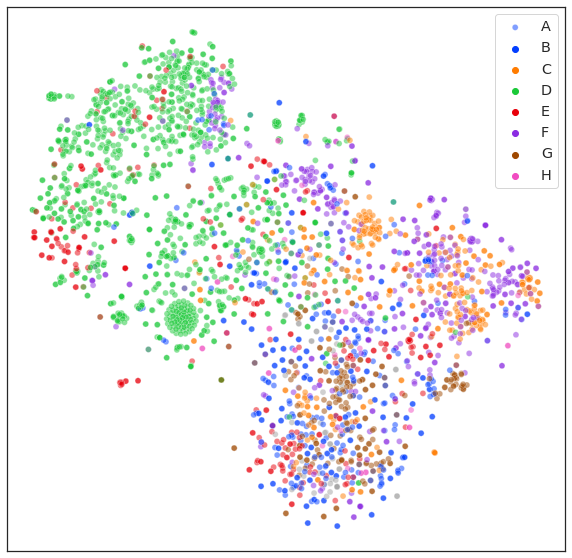

In [976]:
import numpy as np
import matplotlib.pyplot as plt
index = [x for x in range(len(low_dim_data))]
figure_labels = ['A','B','C','D','E','F','G','H']
low_dim_data_dictionary = {
    "x" : low_dim_data[:,0],
    "y" : low_dim_data[:,1]
}
tsne_df =  pd.DataFrame(low_dim_data_dictionary) # t_sne_dataframe.label.replace({1:'sarcasm',0:'normal'})
tsne_df.columns = ['x','y']
ax = sns.scatterplot(data=tsne_df, x='x', y='y', hue=t_sne_dataframe.label,alpha = 0.5) # ,cmap='jet'
ax.set_facecolor('white')
# ax.set_title('Embedding_layer')
plt1.legend(labels = figure_labels, fontsize='x-large')
plt1.gca().axes.xaxis.set_visible(False)
plt1.gca().axes.yaxis.set_visible(False)

plt1.savefig('./230111bert.pdf',
            facecolor='#eeeeee',
            edgecolor='black',
            format='pdf', dpi=300)

In [977]:
# index = [x for x in range(len(low_dim_data_df_vali))]

# low_dim_data_dictionary_df_vali = {
#     "x" : low_dim_data_df_vali[:,0],
#     "y" : low_dim_data_df_vali[:,1]
# }
# tsne_df_df_vali =  pd.DataFrame(low_dim_data_dictionary_df_vali) # t_sne_dataframe.label.replace({1:'sarcasm',0:'normal'})
# tsne_df_df_vali.columns = ['x','y']
# ax = sns.scatterplot(data=tsne_df_df_vali, x='x', y='y', hue=t_sne_dataframe_df_vali.label)
# ax.set_title('label_random')
# # plt1.savefig("bert_sarcasam")
# # 랜덤으로 주었으니 이렇게 나올수 밖에 없지

In [978]:
low_dim_data_dictionary

{'x': array([  8.133191 , -25.67555  ,  10.516737 , ...,  -6.8429146,
         33.488495 , -17.555244 ], dtype=float32),
 'y': array([-34.284084 ,   2.8920856,  40.06252  , ...,   7.253016 ,
         12.594687 ,  54.524323 ], dtype=float32)}

In [979]:
tsne_df.head()

,x,y
0,8.133191,-34.284084
1,-25.675550,2.892086
2,10.516737,40.062519
3,-47.583607,26.811098
4,25.543322,-44.382065


In [980]:
print(type(test_tsne_df.embedding.to_numpy()))
test_tsne_list = []
# test_tsne_list = test_tsne_df.embedding
# test_tsne_df['embedding'] = test_tsne_df.embedding.to_numpy()
# for i,v in enumerate(test_tsne_df.embedding):
#     test_tsne_list.append(v.numpy())
for i,v in enumerate(test_tsne_df.embedding):
    test_tsne_list.append(v)
print(type(test_tsne_list[0]))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [981]:
# tsne_df_df_vali.head()
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarities = cosine_similarity(test_tsne_list, test_tsne_list)
print('코사인 유사도 매트릭스의 크기 :',cosine_similarities.shape)

코사인 유사도 매트릭스의 크기 : (3000, 3000)


In [982]:
t_sne_dataframe.head()

,patentName,text,bert_token_embedding,bert_sentence_embedding,label,tokenized_text
0,5188273,"An expander roller for running webs of paper, ...","[[tensor(-0.0937), tensor(-0.4861), tensor(0.0...","[tensor(-0.1181), tensor(0.1374), tensor(0.456...",B,"[[CLS], an, expand, ##er, roller, for, running..."
1,4668718,The invention relates to epoxy resin moulding ...,"[[tensor(-0.3761), tensor(0.0314), tensor(0.13...","[tensor(0.1005), tensor(0.1684), tensor(0.3303...",H,"[[CLS], the, invention, relates, to, ep, ##ox,..."
2,5139819,A thermally curable polymer thick film composi...,"[[tensor(-0.8213), tensor(-0.4881), tensor(-0....","[tensor(0.4479), tensor(0.0220), tensor(0.5624...",H,"[[CLS], a, thermal, ##ly, cu, ##rable, polymer..."
3,5057239,Spiranic lactone of formula <IMAGE> (I) posses...,"[[tensor(-0.1961), tensor(0.0279), tensor(-0.1...","[tensor(-0.1624), tensor(0.4255), tensor(0.331...",C,"[[CLS], sp, ##ira, ##nic, lac, ##tone, of, for..."
4,4776651,Socket contact (10) has cantilever arms (16) w...,"[[tensor(-0.4167), tensor(-0.7837), tensor(-0....","[tensor(-0.4908), tensor(0.0077), tensor(0.361...",H,"[[CLS], socket, contact, (, 10, ), has, can, #..."


In [983]:
def recommendations(indexes,title):
    books = t_sne_dataframe[['patentName']]

    # 책의 제목을 입력하면 해당 제목의 인덱스를 리턴받아 idx에 저장.
    indices = pd.Series(t_sne_dataframe.index, index = t_sne_dataframe['patentName']).drop_duplicates()    
    idx = indices[title]

    # 입력된 책과 줄거리(document embedding)가 유사한 책 5개 선정.
    sim_scores = list(enumerate(cosine_similarities[idx]))
    sim_scores = sorted(sim_scores, key = lambda x: x[1], reverse = True)
    sim_scores = sim_scores[1:indexes+1]

    # 가장 유사한 책 5권의 인덱스
    book_indices = [i[0] for i in sim_scores]

    # 전체 데이터프레임에서 해당 인덱스의 행만 추출. 5개의 행을 가진다.
    recommend = books.iloc[book_indices].reset_index(drop=True)
#     recommend_list = recommend.to_list()
#     print(recommend)
    
#     print(recommend)
#     for i in recommend.Patent:
#         print(top_n_df[['Patent','semi_code']].loc[top_n_df['Patent'] == i])
#     fig = plt.figure(figsize=(20, 30))
#     recommend.tolist()
    return recommend

In [984]:
print(recommendations(5,5188273))

  patentName
0    5142510
1    5183381
2    5087320
3    4685660
4    4792712


In [985]:
recommendations(10,5188273)

,patentName
0,5142510
1,5183381
2,5087320
3,4685660
4,4792712
5,4729804
6,4908930
7,5046953
8,4836516
9,5196857


In [986]:
# t_sne_dataframe.to_pickle('./dataset/1218real_base_lastdata.pickle')

In [987]:
# test_tsne_df.to_pickle('./dataset/1218real_base_lastdataset.pickle')

In [988]:
test_tsne_df

,embedding,label,nearest_section
0,"[-0.11813982, 0.1374115, 0.4565154, 0.09531560...",B,B
1,"[0.10045512, 0.16843872, 0.3303293, -0.0992868...",H,D
2,"[0.44787085, 0.022009727, 0.562439, -0.3648849...",H,D
3,"[-0.16235827, 0.42554936, 0.33114603, -0.06359...",C,C
4,"[-0.49081004, 0.0076917205, 0.36100736, -0.279...",H,E
...,...,...,...
2995,"[0.13158093, 0.72916013, 0.42540896, -0.573044...",C,C
2996,"[-0.27433053, 0.42382064, 0.37937522, -0.44024...",C,C
2997,"[-0.5449827, 0.54555994, 0.08501161, -0.273008...",C,C
2998,"[-0.59949046, 0.23702879, 0.15656862, 0.029697...",H,H


In [989]:
# np.save('./dataset/1218real_base__mydatatest',test_tsne_df.embedding.values)

In [990]:
# test_tsne_df['label'].to_csv('./dataset/1218real_base__mydatatestlabel.csv')

In [991]:
print('dddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddd')

dddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddd


In [992]:
import pandas as pd
import numpy as np
zeros = np.zeros((8,8))
confusion_prepare = pd.DataFrame(zeros,columns = ['A','B','C','D','E','F','G','H'],index = ['A','B','C','D','E','F','G','H'])
for i,v in enumerate(test_tsne_df.label):
    confusion_prepare.loc[test_tsne_df.label[i],test_tsne_df.nearest_section[i]] = confusion_prepare.loc[test_tsne_df.label[i],test_tsne_df.nearest_section[i]] +1

In [993]:
columns_labels = ['A','B','C','D','E','F','G','H']

In [994]:
# import matplotlib.pyplot as plt

# import seaborn as sns

# plt.rcParams['figure.figsize'] = [20,15]
# plt.pcolor(confusion_prepare)

# plt.xticks(np.arange(len(df.columns)), confusion_prepare.columns)

# plt.yticks(np.arange(0.5, len(df.index), 1), confusion_prepare.index)

# plt.title('Heatmap by plt.pcolor()', fontsize=20)

# plt.xlabel('Year', fontsize=14)

# plt.ylabel('Month', fontsize=14)

# plt.colorbar()



# plt.show()

In [995]:
from sklearn.metrics import confusion_matrix
y_true = test_tsne_df.label
y_pred = test_tsne_df.nearest_section
confusion_matrix(y_true, y_pred)

array([[  81,   17,   78,   11,   65,    9,   17,    6],
       [   3,   75,   50,   54,  106,   93,   37,   13],
       [  58,    9, 1002,   90,    1,    8,   11,    4],
       [   0,    1,    8,   16,    4,    7,    3,    0],
       [   0,    2,    0,    3,   35,    5,    1,    0],
       [   2,   21,    0,    8,   37,  123,   12,    5],
       [  12,   14,   69,   25,   22,   23,  177,  124],
       [   1,   12,   14,   23,   24,   14,   49,  206]])

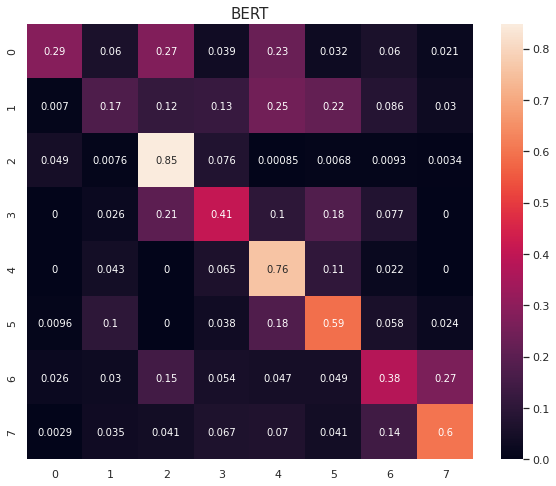

In [996]:

plt .figure(figsize = (10,8))
plt.title('BERT',fontsize=15)
sns.heatmap(confusion_matrix(y_true, y_pred,labels=columns_labels,normalize='true'), annot=True)
plt.savefig('./dataset/tsne_data/230111bert_confusion.pdf',
            facecolor='white',
            edgecolor='black',
            format='pdf', dpi=300)

In [997]:
from sklearn import metrics
# y_true = test_tsne_df.label
# y_pred = test_tsne_df.nearest_section
# Print the confusion matrix
print(metrics.confusion_matrix(y_true, y_pred))

# Print the precision and recall, among other metrics
print(metrics.classification_report(y_true, y_pred, digits=8))

[[  81   17   78   11   65    9   17    6]
 [   3   75   50   54  106   93   37   13]
 [  58    9 1002   90    1    8   11    4]
 [   0    1    8   16    4    7    3    0]
 [   0    2    0    3   35    5    1    0]
 [   2   21    0    8   37  123   12    5]
 [  12   14   69   25   22   23  177  124]
 [   1   12   14   23   24   14   49  206]]
              precision    recall  f1-score   support

           A  0.51592357 0.28521127 0.36734694       284
           B  0.49668874 0.17401392 0.25773196       431
           C  0.82063882 0.84699915 0.83361065      1183
           D  0.06956522 0.41025641 0.11895911        39
           E  0.11904762 0.76086957 0.20588235        46
           F  0.43617021 0.59134615 0.50204082       208
           G  0.57654723 0.37982833 0.45795602       466
           H  0.57541899 0.60058309 0.58773181       343

    accuracy                      0.57166667      3000
   macro avg  0.45125005 0.50613849 0.41640746      3000
weighted avg  0.63212108 0.5716